In [1]:
# data: Mall_Customers.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [9]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

#### create input data

In [12]:
x = df.iloc[:,[3,4]]

In [14]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### Visualize the data

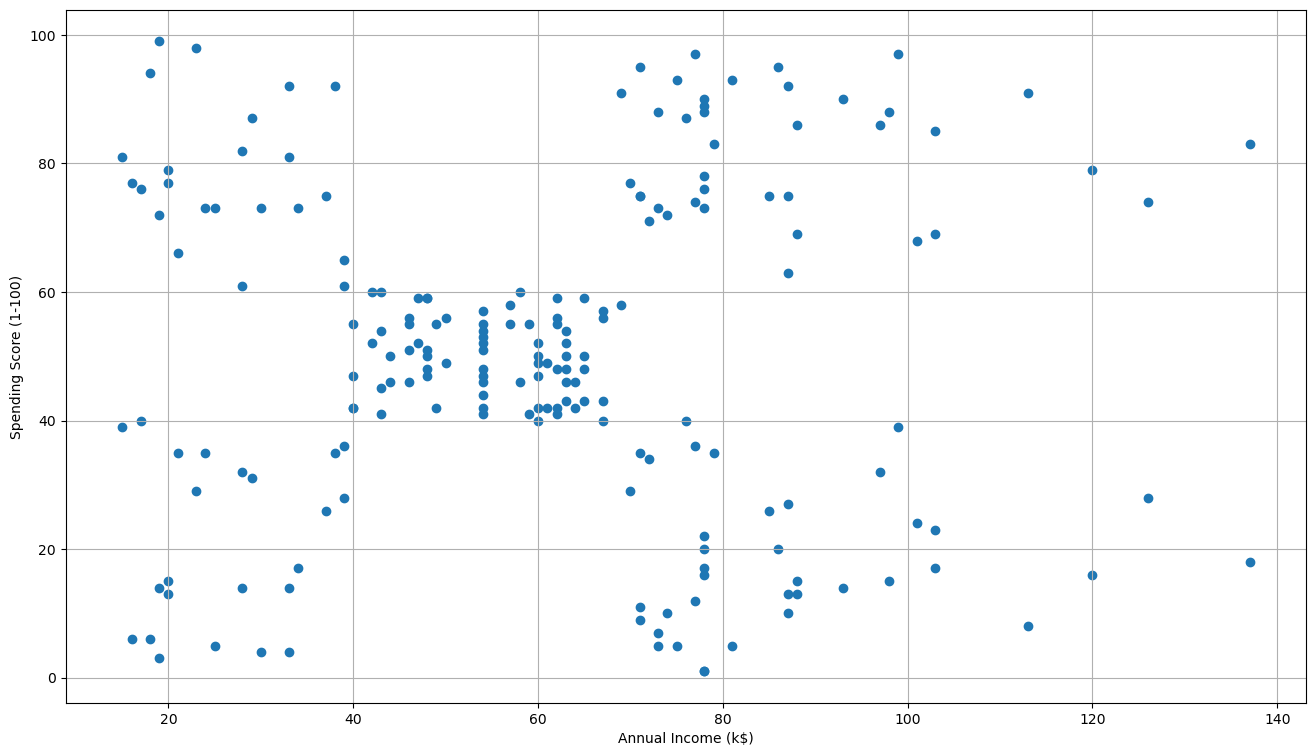

In [19]:
plt.figure(figsize=(16,9))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.grid()

#### sum of squared error

In [22]:
from sklearn.cluster import KMeans

In [24]:
km = KMeans(n_clusters= 3)

In [28]:
labels = km.fit_predict(x)

In [30]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [32]:
km.inertia_

106348.37306211122

#### Elbow method

In [37]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters= k)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [39]:
sse

[269981.28,
 186362.95600651755,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37271.88623658949,
 33885.16593706144,
 26156.85320999756,
 26454.608799802343,
 21079.826032782614,
 20619.99275966591,
 16856.94088958164,
 15277.679184753115,
 14033.728100968796,
 13962.13487565066]

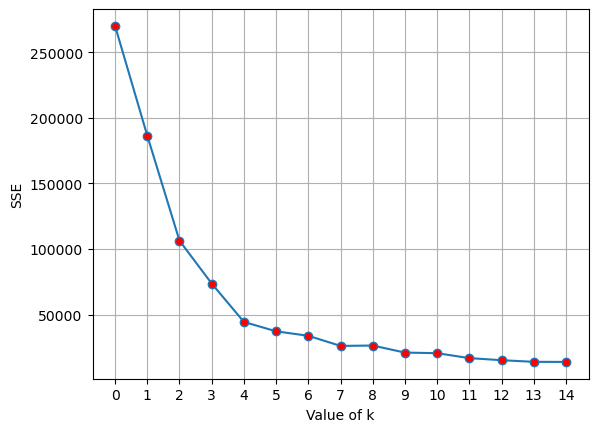

In [41]:
plt.xlabel('Value of k')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(0,17,1))
plt.plot(sse, marker = 'o', mfc = 'red');

In [43]:
# !pip install kneed

In [45]:
from kneed import KneeLocator

In [47]:
kl = KneeLocator(range(1,16), sse, direction= 'decreasing', 
                curve= 'convex')

In [51]:
kl.elbow

5

#### Silh method

In [54]:
from sklearn.metrics import silhouette_score

In [56]:
silh = []
for k in range(2,16):
    km = KMeans(n_clusters= k, random_state= 0)
    labels = km.fit_predict(x)
    silh.append(silhouette_score(x, labels))

In [58]:
silh

[0.3848654187182249,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.45705720010448403,
 0.45485522128402084,
 0.46072786639159125,
 0.4578527068857916,
 0.4221740515026349,
 0.4214357152930456,
 0.40598959614312446,
 0.3931580457193786,
 0.3848587883658634,
 0.38230811621951916]

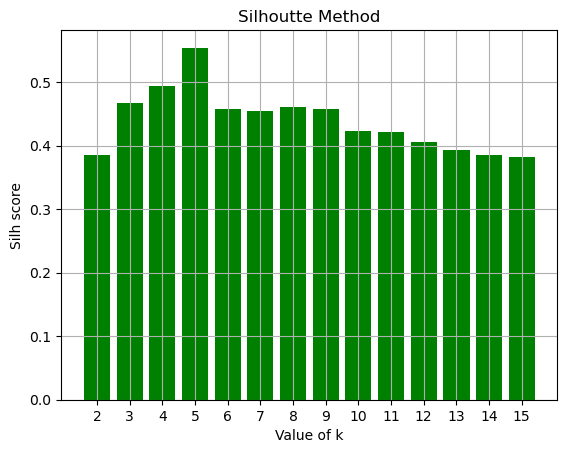

In [64]:
plt.title('Silhoutte Method')
plt.xlabel('Value of k')
plt.ylabel('Silh score')
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16), silh, color= 'green');

In [66]:
km = KMeans(n_clusters= 5)

In [68]:
labels = km.fit_predict(x)

In [70]:
labels

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [72]:
km.inertia_

44448.4554479337

In [74]:
cent = km.cluster_centers_

In [76]:
cent

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

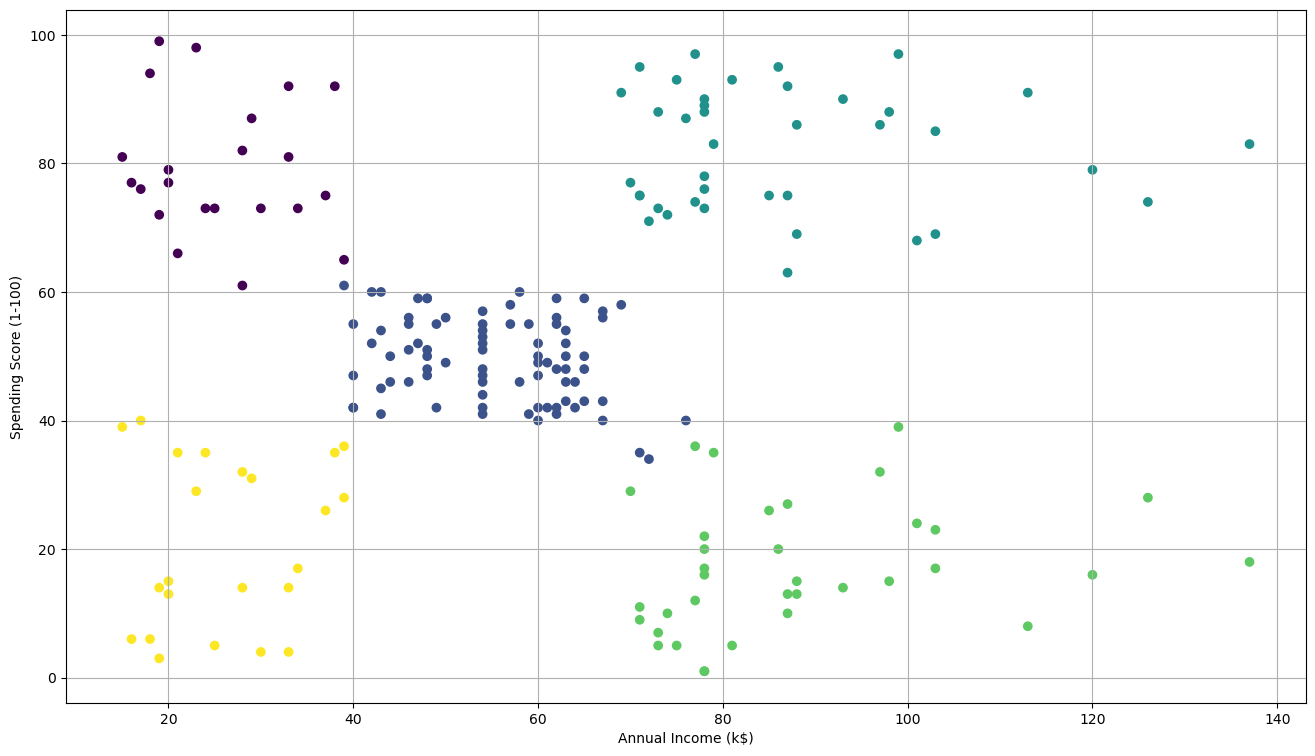

In [78]:
plt.figure(figsize=(16,9))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c = labels)
plt.grid()

### filter out the clusters

In [81]:
zero = df[labels == 0]

In [83]:
zero

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
11,12,Female,35,19,99
13,14,Female,24,20,77
15,16,Male,22,20,79
17,18,Male,20,21,66
19,20,Female,35,23,98


In [85]:
one = df[labels == 1]
two = df[labels == 2]
three = df[labels == 3]
four =df[labels == 4]

In [87]:
one.shape, two.shape, three.shape, four.shape

((81, 5), (39, 5), (35, 5), (23, 5))

#### predict on new value

In [90]:
new1 = [[25, 78]]

In [104]:
new2 = [[10, 60]]

In [106]:
km.predict(new1)

/home/aditya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [108]:
km.predict(new2)

/home/aditya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)